# 미션
-

In [30]:
import pandas as pd
df1 = pd.read_csv('06_Data.csv')
df1.head()


,Unnamed: 0,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량
0,0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.750000,80.668990
1,1,2019-05-16,29350,리큐 진한겔드럼 3L NEW,8801046893128,발주가능,0,235,2772,6077394,19리큐 진한겔 알카2.7용기(드),세탁세제,4,58.750000,47.182979
2,2,2019-05-16,29351,울샴푸아웃도어 800ml 용기,8801046878934,발주가능,0,2,35,6077406,19울샴푸아웃도 800ml(리뉴얼),세탁세제,9,0.222222,157.500000
3,3,2019-05-16,29352,울샴푸아웃도어 1L 일자형 리필,8801046878941,발주가능,207,41,2083,6077404,19울샴푸아웃도 1L(리뉴얼),세탁세제,9,4.555556,457.243902
4,4,2019-05-16,29359,Pack 2080오리지날칫솔 5+5입_탄력모,8801046888858,발주가능,288,312,3411,5009109,182080오리지날칫솔 5+5입(탄력모),덴탈케어,8,39.000000,87.461538


## 1. 2019년 5월 대비 8월의 "쿠팡출고수량"이 몇 퍼센트 증가했는지 계산하시오.

In [55]:
df1['날짜_dt'] = pd.to_datetime(df1['날짜'])
df1['month'] = df1['날짜_dt'].dt.month
df1.head()

cond1 = (df1['month'] == 5)
p1 = df1.loc[cond1]
month_5 = p1['쿠팡출고수량'].sum()

cond2 = (df1['month'] == 8)
p2 = df1.loc[cond2]
month_8 = p2['쿠팡출고수량'].sum()

month_8 / month_5

0.467435830355694

## 2. 각 카테고리 별 5월 대비 8월의 "쿠팡출고수량"의 증감율을 계산하시오. 

In [63]:
df1['카테고리'].unique()

array(['세탁세제', '덴탈케어', '헤어케어', '주방세제', 'ST', 'F&B', '기타', '매입브랜드'],
      dtype=object)

In [114]:
p1 = df1.pivot_table(index = '카테고리' , values = '쿠팡출고수량', aggfunc = 'sum' ,columns = 'month')

cond3 = (p1.columns == 5)
cond3

array([ True, False, False, False])

## 3. '발주가능상태'에서 '발주중단' 된 데이터의 특성을 파악하고자 한다. '발주중단' 데이터만 추출하여, 카테고리의 빈도수를 확인하고, 연속형 자료의 기술통계량을 계산하시오. 

In [228]:
import numpy as np
cond1 = (df1['발주가능상태'] == '발주중단')
p1 = df1.loc[cond1]
p2 = p1.describe(include = 'all')
p2
p2['카테고리']

count       95
unique       3
top       헤어케어
freq        78
mean       NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
std        NaN
Name: 카테고리, dtype: object

## 4.19년도 7월 2번째 주에 '쿠팡출고수량'이 가장 많은 '카테고리'는 무엇인지 확인하시오.

In [289]:
df1.head(2)

,Unnamed: 0,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량,날짜_dt,month,등급분류
0,0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.75,80.668990,2019-05-16,5,NaN
1,1,2019-05-16,29350,리큐 진한겔드럼 3L NEW,8801046893128,발주가능,0,235,2772,6077394,19리큐 진한겔 알카2.7용기(드),세탁세제,4,58.75,47.182979,2019-05-16,5,NaN


In [352]:
# df1['Day_of_week'] = df1['Datetime_dt'].dt.day_name()
# df1['Week'] = df1['Datetime_dt'].dt.isocalendar().week

df1['Day_of_week'] = df1['날짜_dt'].dt.day_name()
df1['주차'] = df1['날짜_dt'].dt.isocalendar().week
cond1 = (df1['주차'] == 27)
cond1
p1 = df1.loc[cond1]
p1
p2 = p1.sort_values(by = '쿠팡출고수량' , ascending = False)
p2.head(1)
# top_1 = p1.sort_values(by = '쿠팡출고수량' , ascending = False)
# top_1['카테고리']

,Unnamed: 0,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량,날짜_dt,month,등급분류,주차,Day_of_week
22167,22167,2019-07-01,3031368,Box_리큐 진한겔 액체세제 일반용 리필형 2.1L * 4입,18801046294762,발주가능,0,1221,9010,6067098,17리큐 진한겔 2.1L온라인4입(화),세탁세제,4,305.25,29.51679,2019-07-01,7,NaN,27,Monday


## 5. 각 '자재명' 별 '쿠팡출고수량', '입고수량'의 평균을 계산하고, 계산된 결과에서 '쿠팡출고수량'의 상위 10% '자재명'을 'A' / 상위 30%를 'B' / 상위 60%를 'C' / 나머지를 'D'로 '등급분류'라는 파생변수를 생성하고, 각 등급에서 가장 많이 등장한 '카테고리'항목이 무엇인지 확인하시오. 

In [615]:
p1 = df1.pivot_table(index = '자재명' , values = ['쿠팡출고수량' , '입고수량'] , aggfunc = 'mean') 
top_10 = p1['쿠팡출고수량'].quantile(0.9) 
top_30 = p1['쿠팡출고수량'].quantile(0.7) 
top_60 = p1['쿠팡출고수량'].quantile(0.4) 
# list1 = p1['쿠팡출고수량'].values
p1


,입고수량,쿠팡출고수량
자재명,,
10순샘BubbleOlive 350ml용기,50.349650,40.524476
14New바세린리프팅 450ml로션,17.840000,30.246667
14순샘제로만다린.M 1.0L파우치-친환경,0.000000,0.000000
162080 스마트케어웨이브 4입,21.450331,19.112583
162080 스마트케어칫솔_4입,96.000000,34.220779
...,...,...
외2080팔레트 30gx6입(세트),26.857143,4.471429
전2080덴티스트리 나이트리페어 100g(스티,0.423529,0.117647
전2080진지발리스K 진저민트120+20gx3입,0.000000,0.065574


In [617]:

def grade_classify(row):
    if row == top_10:
        return 'A'
    elif row == top_30:
        return 'B'
    elif row == top_60:
        return 'C'
    else:
        return 'D'
p1['등급분류'] = p1['쿠팡출고수량'].apply(grade_classify)
p1['등급분류'].unique()

array(['D', 'A', 'C'], dtype=object)

In [ ]:
# 각 등급에서 가장 많이 등장한 '카테고리'항목이 무엇인지 확인하시오


## 6. '카테고리'를 사용자로부터 입력받아, '발주가능상태'에 따른 '월'(날짜로 부터 계산) 별 '쿠팡출고수량'의 합을 계산하여 시각화 하고 해당 그래프를 '카테고리명_월별_쿠팡출고량.png'파일 형태로 저장하는 함수를 만드시오. 

In [374]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
mpl.rc('font' , family = 'Malgun Gothic')

In [390]:
df1.columns

Index(['Unnamed: 0', '날짜', 'SKU ID', 'SKU 명', '바코드', '발주가능상태', '입고수량',
       '쿠팡출고수량', '쿠팡현재재고수량', '자재번호', '자재명', '카테고리', '입수', '출고수량', '재고수량',
       '날짜_dt', 'month', '등급분류', '주차', 'Day_of_week'],
      dtype='object')

In [410]:
# category_data = input('카테고리 입력')

In [408]:
df2 = df1.pivot_table(index = 'month' , values = '쿠팡출고수량' , columns = '발주가능상태' , aggfunc = 'sum').reset_index()
# sns.barplot (df2, x = 'month' , y = '발주가능상태')
df2

발주가능상태,month,단종,발주가능,발주중단
0,5,NaN,301973.0,NaN
1,6,252.0,608295.0,10.0
2,7,170.0,616237.0,922.0
3,8,21.0,141020.0,112.0


## 7. '카테고리'빈도수가 가장 많은 항목의 '입고수량'이 높은 상위 100개 데이터를 result_category.xlsx로 저장하시오.

In [426]:
df1['카테고리'].describe()

count     36833
unique        8
top        세탁세제
freq      10339
Name: 카테고리, dtype: object

In [444]:
cond1 = (df1['카테고리'] == '세탁세제')
df2 = df1.loc[cond1]
df2
df2.sort_values(by = '입고수량' , ascending = False).head(100).to_excel('result_category.xlsx')

## 8. 각 '카테고리'별 7월과 8월의 쿠팡출고수량 '평균'과 '합'의 차이를 계산하시오. 

In [582]:
cond1 = (df1['month'] == 7) 
cond2 = (df1['month'] == 8)
p1 = df1.loc[cond1]
p2 = df1.loc[cond2]
# print(p1['쿠팡출고수량'].mean() - p2['쿠팡출고수량'].mean() , p1['쿠팡출고수량'].sum() - p2['쿠팡출고수량'].sum())

month7_sum = p1.pivot_table(index = '카테고리' , values = '쿠팡출고수량' , aggfunc = 'sum')
month8_sum = p2.pivot_table(index = '카테고리' , values = '쿠팡출고수량' , aggfunc = 'sum')
month7_sum - month8_sum

,쿠팡출고수량
카테고리,
F&B,32668
ST,6768
기타,2341
덴탈케어,114295
매입브랜드,2160
세탁세제,139922
주방세제,83841
헤어케어,94181


In [584]:
month7_mean = p1.pivot_table(index = '카테고리' , values = '쿠팡출고수량' , aggfunc = 'mean')
month8_mean = p2.pivot_table(index = '카테고리' , values = '쿠팡출고수량' , aggfunc = 'mean')
month7_mean - month8_mean

,쿠팡출고수량
카테고리,
F&B,-12.470227
ST,-3.915237
기타,-3.223365
덴탈케어,-21.115412
매입브랜드,-2.594365
세탁세제,-10.547251
주방세제,-17.291145
헤어케어,-15.699809


## 9. '입고수량'과 '쿠팡출고수량'의 상관관계를 산점도를 이용해 시각화 하시오. 

<Axes: xlabel='입고수량', ylabel='쿠팡출고수량'>

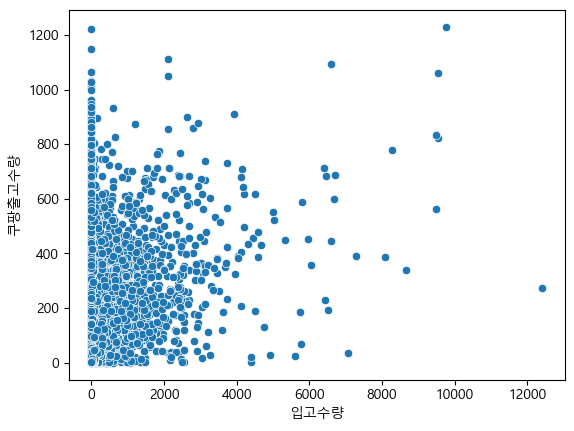

In [534]:
sns.scatterplot(df1, x= '입고수량' , y = '쿠팡출고수량')